✅ Step-by-Step Plan
1.	Load the data.
2.	Explore the dataset.
3.	Visualize the relationship between income and happiness.
4.	Prepare data for the model.
5.	Split data into training and testing sets.
6.	Train a simple linear regression model.
7.	Evaluate the model.
8.	Visualize predictions vs actual data.

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 2: Load your dataset (replace 'your_file.csv' with actual file path)
df = pd.read_csv("/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/Linear-Regression-with-GiGi/Models/IncomeData/income.data.csv")

# Display the first 5 rows
print(df.head())

   Unnamed: 0    income  happiness
0           1  3.862647   2.314489
1           2  4.979381   3.433490
2           3  4.923957   4.599373
3           4  3.214372   2.791114
4           5  7.196409   5.596398


In [4]:
# Step 3: Basic Exploration
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nNull Values:\n", df.isnull().sum())

Shape of dataset: (498, 3)

Data Types:
 Unnamed: 0      int64
income        float64
happiness     float64
dtype: object

Summary Statistics:
        Unnamed: 0      income   happiness
count  498.000000  498.000000  498.000000
mean   249.500000    4.466902    3.392859
std    143.904482    1.737527    1.432813
min      1.000000    1.506275    0.266044
25%    125.250000    3.006256    2.265864
50%    249.500000    4.423710    3.472536
75%    373.750000    5.991913    4.502621
max    498.000000    7.481521    6.863388

Null Values:
 Unnamed: 0    0
income        0
happiness     0
dtype: int64


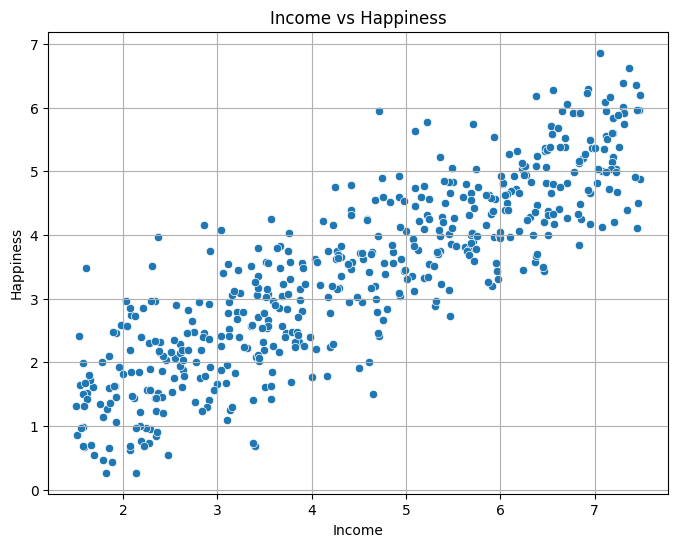

In [5]:
# Step 4: Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='happiness', data=df)
plt.title('Income vs Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.grid(True)
plt.show()

In [6]:
# Step 5: Prepare data for modeling
X = df[['income']]  # Feature must be in 2D shape
y = df['happiness'] # Target variable

In [7]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 7: Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 0.14170387223711955
Coefficient: 0.7247687016181725


In [9]:
# Step 8: Predict on the test data
y_pred = model.predict(X_test)

In [10]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.5901463943118466
R-squared Score: 0.6662585264508232


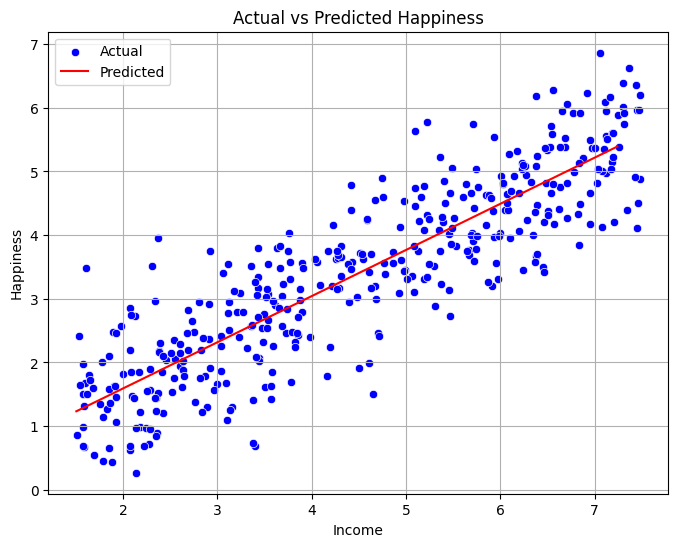

In [11]:
# Step 10: Plot regression line on test data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['income'], y=y_train, color='blue', label='Actual')
sns.lineplot(x=X_test['income'], y=y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.legend()
plt.grid(True)
plt.show()

## Apply cross_val_score on Income vs Happiness Regression

It automatically:
1.	Splits your dataset into k folds (default: 5).
2.	Trains the model on k-1 parts and tests it on the remaining part.
3.	Repeats this process k times, once for each fold.
4.	Returns an array of scores for each fold.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Our feature and target
X = df[['income']]
y = df['happiness']

# Create the model
model = LinearRegression()

# Perform 5-fold cross-validation (default scoring for regression is R² score)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation R² scores for each fold:", scores)
print("Mean R² score:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))

Cross-Validation R² scores for each fold: [0.7735207  0.75183542 0.70456215 0.70842812 0.78385928]
Mean R² score: 0.7444411322956679
Standard deviation of scores: 0.03268442255450016


| Term          | Meaning                          |
|---------------|----------------------------------|
| `cv=5`        | 5-fold cross-validation          |
| `scores`      | R² values for each fold          |
| `mean(scores)`| Overall model performance        |
| `std(scores)` | Stability/variance of the model  |

#### Use Different Scoring Metrics

Common options:
- 'r2': R² score
- 'neg_mean_squared_error'
- 'neg_mean_absolute_error'

In [13]:
cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

array([-0.50595331, -0.4699877 , -0.67444608, -0.50707347, -0.42667218])

## Simple Linear Regression using OLS (Ordinary Least Squares)

#### 📦 What is OLS?

OLS (Ordinary Least Squares) is a regression method used to minimize the sum of squared differences between observed and predicted values. statsmodels provides a detailed regression summary using OLS.

In [14]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Load your data
df = pd.read_csv("income.data.csv")

# Step 2: Define independent and dependent variables
X = df['income']          # Predictor
X = sm.add_constant(X)    # Adds intercept term (constant) to the model
y = df['happiness']       # Target

# Step 3: Fit the model
model = sm.OLS(y, X).fit()

# Step 4: View the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          3.96e-151
Time:                        13:47:52   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.089      2.299      0.0

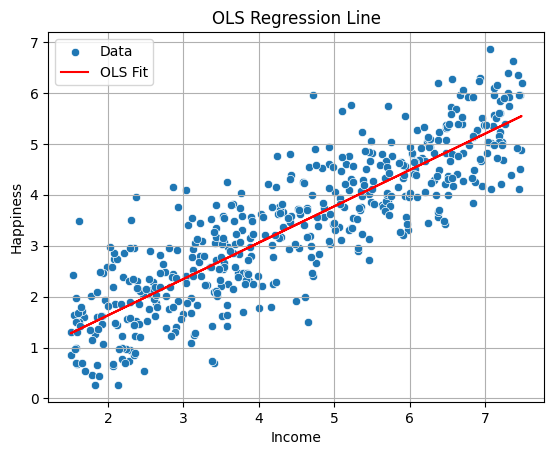

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='income', y='happiness', data=df, label='Data')
plt.plot(df['income'], model.predict(X), color='red', label='OLS Fit')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('OLS Regression Line')
plt.legend()
plt.grid(True)
plt.show()

✅ When to use OLS via statsmodels?
- For detailed statistical summary and hypothesis testing.
- To check p-values and confidence intervals.
- When interpretability is a priority over just prediction.

## Regplot

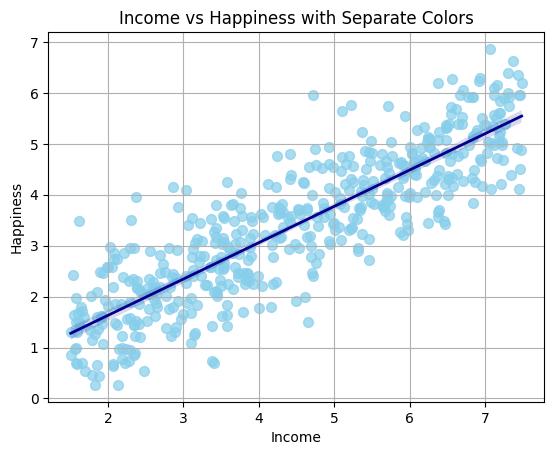

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x='income',
    y='happiness',
    data=df,
    ci=95,
    scatter_kws={'color': 'skyblue', 's': 50, 'alpha': 0.7},  # Scatter points
    line_kws={'color': 'darkblue', 'linewidth': 2, 'linestyle': '-'}  # Regression line
)

plt.title('Income vs Happiness with Separate Colors')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.grid(True)
plt.show()